<a href="https://colab.research.google.com/github/brandnewmin/brandnewm/blob/master/2018_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 기본설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()

%matplotlib inline
plt.rc('font', family='NanumBarunGothic') 

## 데이터

In [4]:
sns2018_1 = pd.read_csv('/content/drive/My Drive/weatherdata/sns2018_1.csv')

In [ ]:
sns2018_1.head()

,Unnamed: 0,sns2018_1.date,sns2018_1.big_cat,sns2018_1.sm_cat,sns2018_1.cnt
0,1,20180101,뷰티,기능성 링클케어 화장품,12.154295
1,2,20180101,뷰티,기능성 모공관리 화장품,36.000828
2,3,20180101,뷰티,기능성 아이케어 화장품,0.895782
3,4,20180101,뷰티,기능성 영양보습 화장품,14.868175
4,5,20180101,뷰티,기능성 트러블케어 화장품,48.819391


In [5]:
buy2018_1 = pd.read_csv("/content/drive/My Drive/weatherdata/buy2018_1.csv")
buy2018_1.head()

,Unnamed: 0,buy2018_1.date,buy2018_1.sex,buy2018_1.age,buy2018_1.big_cat,buy2018_1.sm_cat,buy2018_1.qty
0,1,20180101,F,20,식품,가공란,37
1,2,20180101,F,30,식품,가공란,16
2,3,20180101,F,40,식품,가공란,9
3,4,20180101,F,50,식품,가공란,3
4,5,20180101,M,20,식품,가공란,13


## xxx2018_1 데이터프레임 기본 정보 확인하기 

In [ ]:
print(sns2018_1.info(), buy2018_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69323 entries, 0 to 69322
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         69323 non-null  int64  
 1   sns2018_1.date     69323 non-null  int64  
 2   sns2018_1.big_cat  69323 non-null  object 
 3   sns2018_1.sm_cat   69323 non-null  object 
 4   sns2018_1.cnt      69323 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498010 entries, 0 to 498009
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         498010 non-null  int64 
 1   buy2018_1.date     498010 non-null  int64 
 2   buy2018_1.sex      498010 non-null  object
 3   buy2018_1.age      498010 non-null  int64 
 4   buy2018_1.big_cat  498010 non-null  object
 5   buy2018_1.sm_cat   498010 non-null  object


In [ ]:
print(sns2018_1.describe())
print(buy2018_1.describe())

         Unnamed: 0  sns2018_1.date  sns2018_1.cnt
count  69323.000000    6.932300e+04   69323.000000
mean   34662.000000    2.018037e+07      39.656999
std    20011.970693    1.712802e+02     111.823212
min        1.000000    2.018010e+07       0.000000
25%    17331.500000    2.018022e+07       1.763655
50%    34662.000000    2.018040e+07       8.888279
75%    51992.500000    2.018052e+07      34.104390
max    69323.000000    2.018063e+07    2000.728020
          Unnamed: 0  buy2018_1.date  buy2018_1.age  buy2018_1.qty
count  498010.000000    4.980100e+05  498010.000000  498010.000000
mean   249005.500000    2.018037e+07      38.258589      18.163989
std    143763.248116    1.714145e+02      13.163646      42.632534
min         1.000000    2.018010e+07      20.000000       1.000000
25%    124503.250000    2.018021e+07      30.000000       2.000000
50%    249005.500000    2.018040e+07      40.000000       6.000000
75%    373507.750000    2.018052e+07      50.000000      16.000000
max  

In [ ]:
print(sns2018_1.isnull().sum())
print(buy2018_1.isnull().sum())

Unnamed: 0           0
sns2018_1.date       0
sns2018_1.big_cat    0
sns2018_1.sm_cat     0
sns2018_1.cnt        0
dtype: int64
Unnamed: 0           0
buy2018_1.date       0
buy2018_1.sex        0
buy2018_1.age        0
buy2018_1.big_cat    0
buy2018_1.sm_cat     0
buy2018_1.qty        0
dtype: int64


## buy2018_1 > buy2018_df >> monthlysum
* monthlysum_sns

In [6]:
#sns랑 칼럼 맞추겠음
buy2018_df = buy2018_1.drop(['buy2018_1.sex', 'buy2018_1.age'], axis = 1)
buy2018_df.head()

,Unnamed: 0,buy2018_1.date,buy2018_1.big_cat,buy2018_1.sm_cat,buy2018_1.qty
0,1,20180101,식품,가공란,37
1,2,20180101,식품,가공란,16
2,3,20180101,식품,가공란,9
3,4,20180101,식품,가공란,3
4,5,20180101,식품,가공란,13


In [7]:
#sns2018_1에서 월 변수 생성
#.date의 자료형을 int에서 str 형으로 바꾼듯?
sns2018_1['month'] = sns2018_1['sns2018_1.date'].apply(lambda x : pd.to_datetime(str(x), format = '%Y%m%d'))
#month만 추출
sns2018_1['month'] = sns2018_1['month'].dt.month

In [8]:
sns2018_1.drop(['sns2018_1.date'], axis = 1, inplace = True)

In [9]:
buy2018_df['month'] = buy2018_df['buy2018_1.date'].apply(lambda x : pd.to_datetime(str(x), format = "%Y%m%d"))
buy2018_df['month'] = buy2018_df['month'].dt.month
buy2018_df.head()

,Unnamed: 0,buy2018_1.date,buy2018_1.big_cat,buy2018_1.sm_cat,buy2018_1.qty,month
0,1,20180101,식품,가공란,37,1
1,2,20180101,식품,가공란,16,1
2,3,20180101,식품,가공란,9,1
3,4,20180101,식품,가공란,3,1
4,5,20180101,식품,가공란,13,1


In [ ]:
buy2018_1.nunique() #애초에 382개면 난 어떡하라는거지?

In [ ]:
sns2018_1.nunique()

In [12]:
buy2018_df.drop(['buy2018_1.date'], axis = 1, inplace = True)

* big_cat값들로만 볼거야 행이 하나 없는게 영 신경쓰이는데 이거 제외하고 보면 좋은데

In [ ]:
# buy에서 없는 행이 무엇인지 찾고, .sm_cat unique()맞춰서 데이터프레임을 맞추면 좋겠다.

In [35]:
#groupby : 월간 big_cat 합계량
monthlysum = buy2018_df[['buy2018_1.big_cat','month','buy2018_1.qty']].groupby(['buy2018_1.big_cat','month'], as_index = False).sum()
monthlysum.head()

,buy2018_1.big_cat,month,buy2018_1.qty
0,냉난방가전,1,52804
1,냉난방가전,2,30456
2,냉난방가전,3,35758
3,냉난방가전,4,38467
4,냉난방가전,5,45788


In [42]:
monthlysum_sns = sns2018_1[['sns2018_1.big_cat', 'month','sns2018_1.cnt']].groupby(['sns2018_1.big_cat','month'], as_index = False).sum()
monthlysum_sns.head()

,sns2018_1.big_cat,month,sns2018_1.cnt
0,냉난방가전,1,12440.416317
1,냉난방가전,2,7678.901949
2,냉난방가전,3,9309.293611
3,냉난방가전,4,8445.080205
4,냉난방가전,5,8857.426924


In [45]:
monthlysum_sns.drop(['month'],axis = 1, inplace = True)
monthlysum_sns.head()

,sns2018_1.big_cat,sns2018_1.cnt
0,냉난방가전,12440.416317
1,냉난방가전,7678.901949
2,냉난방가전,9309.293611
3,냉난방가전,8445.080205
4,냉난방가전,8857.426924


In [ ]:
print(monthlysum['buy2018_1.big_cat'].value_counts(), monthlysum_sns['sns2018_1.big_cat'].value_counts())

식품       1272
뷰티        776
냉난방가전     235
Name: buy2018_1.big_cat, dtype: int64 식품       1272
뷰티        786
냉난방가전     240
Name: sns2018_1.big_cat, dtype: int64


In [49]:
print(monthlysum.shape)
print(monthlysum_sns.shape)

(18, 3)
(18, 2)


In [46]:
df2018_1 = pd.concat([monthlysum, monthlysum_sns], axis = 1)
df2018_1.head()

,buy2018_1.big_cat,month,buy2018_1.qty,sns2018_1.big_cat,sns2018_1.cnt
0,냉난방가전,1,52804,냉난방가전,12440.416317
1,냉난방가전,2,30456,냉난방가전,7678.901949
2,냉난방가전,3,35758,냉난방가전,9309.293611
3,냉난방가전,4,38467,냉난방가전,8445.080205
4,냉난방가전,5,45788,냉난방가전,8857.426924


In [48]:
df2018_1[['buy2018_1.big_cat', 'month', 'buy2018_1.qty', 'sns2018_1.cnt']].groupby(['buy2018_1.big_cat', 'month']).count()
df2018_1.head()

,buy2018_1.big_cat,month,buy2018_1.qty,sns2018_1.big_cat,sns2018_1.cnt
0,냉난방가전,1,52804,냉난방가전,12440.416317
1,냉난방가전,2,30456,냉난방가전,7678.901949
2,냉난방가전,3,35758,냉난방가전,9309.293611
3,냉난방가전,4,38467,냉난방가전,8445.080205
4,냉난방가전,5,45788,냉난방가전,8857.426924


In [51]:
df2018_1.drop(['sns2018_1.big_cat'], axis = 1, inplace = True)
df2018_1.head()

,buy2018_1.big_cat,month,buy2018_1.qty,sns2018_1.cnt
0,냉난방가전,1,52804,12440.416317
1,냉난방가전,2,30456,7678.901949
2,냉난방가전,3,35758,9309.293611
3,냉난방가전,4,38467,8445.080205
4,냉난방가전,5,45788,8857.426924


In [52]:
df2018_1.columns = ['bigcat','month','qty','cnt']
df2018_1.head()

,bigcat,month,qty,cnt
0,냉난방가전,1,52804,12440.416317
1,냉난방가전,2,30456,7678.901949
2,냉난방가전,3,35758,9309.293611
3,냉난방가전,4,38467,8445.080205
4,냉난방가전,5,45788,8857.426924


In [59]:
df2018_1['bigcat'].unique

<bound method Series.unique of 0     냉난방가전
1     냉난방가전
2     냉난방가전
3     냉난방가전
4     냉난방가전
5     냉난방가전
6        뷰티
7        뷰티
8        뷰티
9        뷰티
10       뷰티
11       뷰티
12       식품
13       식품
14       식품
15       식품
16       식품
17       식품
Name: bigcat, dtype: object>

In [ ]:
df2018_1.value_counts()

In [ ]:
df2018_1.tail()

In [60]:
df2018_1['bigcat'] = df2018_1['bigcat'].replace(['냉난방가전','뷰티', '식품'], ['machine','beauty','food'])
df2018_1['bigcat'].unique

<bound method Series.unique of 0     machine
1     machine
2     machine
3     machine
4     machine
5     machine
6      beauty
7      beauty
8      beauty
9      beauty
10     beauty
11     beauty
12       food
13       food
14       food
15       food
16       food
17       food
Name: bigcat, dtype: object>

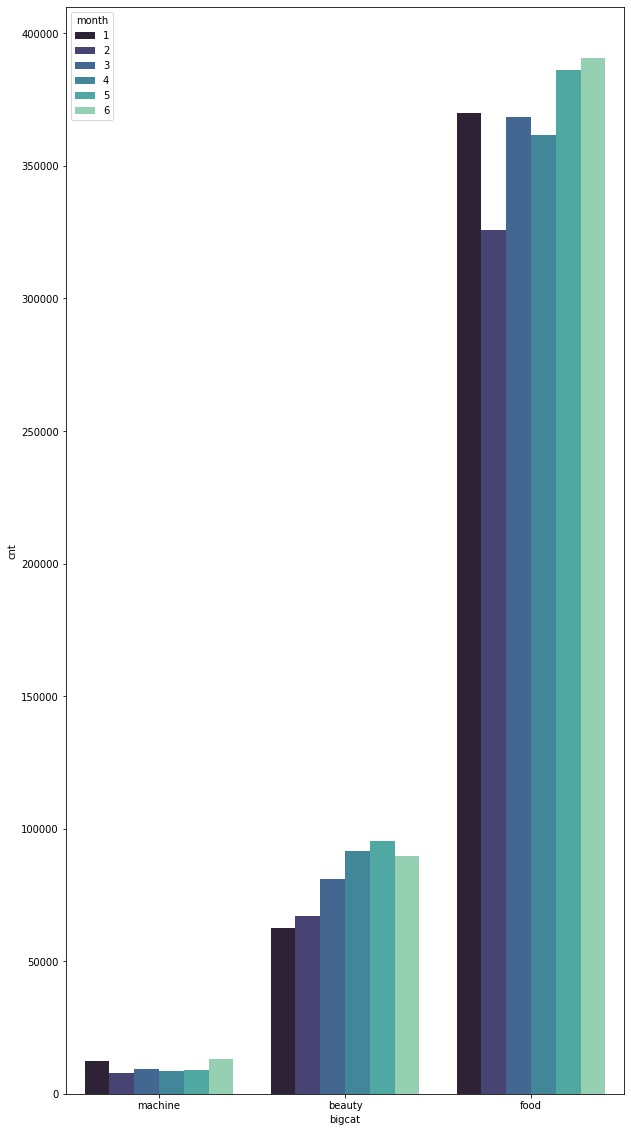

In [68]:
#big_cat 구매량
ind = np.arange(df2018_1.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize = (10,20))
sns.barplot(x = 'bigcat', y = 'cnt', hue = 'month', data = df2018_1, palette="mako")
plt.show()

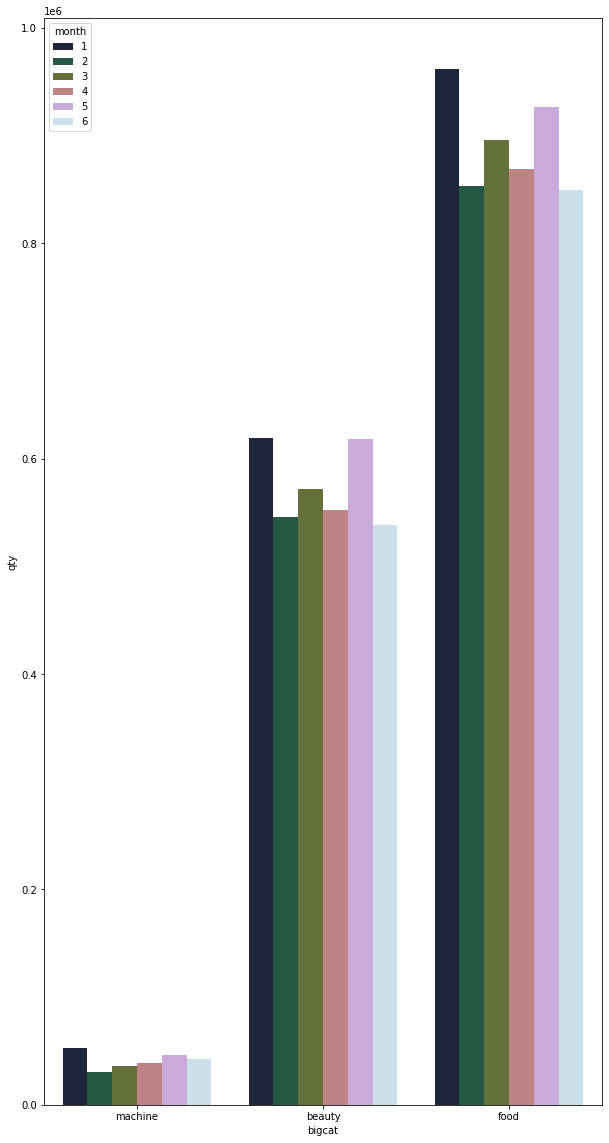

In [67]:
ind = np.arange(df2018_1.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize = (10,20))
sns.barplot(x = 'bigcat', y = 'qty', hue = 'month', data = df2018_1, palette="cubehelix")
plt.show()

# 몰라

In [ ]:
print(monthlysum['buy2018_1.big_cat'].unique(), monthlysum_sns['sns2018_1.big_cat'].unique())

['냉난방가전' '뷰티' '식품'] ['냉난방가전' '뷰티' '식품']


In [ ]:
monthlysum['buy2018_1.sm_cat'].eq(monthlysum_sns['sns2018_1.sm_cat'])

0        True
1        True
2        True
3        True
4        True
        ...  
2293    False
2294    False
2295    False
2296    False
2297    False
Length: 2298, dtype: bool

In [ ]:
print(monthlysum['buy2018_1.sm_cat'].nunique(), monthlysum_sns['sns2018_1.sm_cat'].nunique())

382 383


In [ ]:
print(monthlysum['buy2018_1.sm_cat'].value_counts(), monthlysum_sns['sns2018_1.sm_cat'].value_counts())

감마리놀렌산 영양제      6
반건조고구마          6
젓갈류             6
색조 메이크업 립글로스    6
바디케어용 슬리밍       6
               ..
건어물 건새우         6
복분자/석류/과실즙      6
중대형 에어컨         4
난방용 열풍기         3
여성향수            2
Name: buy2018_1.sm_cat, Length: 382, dtype: int64 감마리놀렌산 영양제      6
반건조고구마          6
젓갈류             6
색조 메이크업 립글로스    6
바디케어용 슬리밍       6
               ..
손톱정리도구          6
난방용 열풍기         6
클렌징 폼           6
건어물 건새우         6
휴대용 선풍기         6
Name: sns2018_1.sm_cat, Length: 383, dtype: int64


In [ ]:
print(monthlysum['buy2018_1.sm_cat'].unique(), monthlysum_sns['sns2018_1.sm_cat'].unique())

## under

In [ ]:
buy2018_1['buy2018_1.big_cat'].unique()

array(['식품', '냉난방가전', '뷰티'], dtype=object)

In [ ]:
buy2018_1['buy2018_1.sm_cat'].unique()

array(['가공란', '가열식 가습기', '가자미', '갈비/찜/바비큐용 돈육', '갈비용 우육', '갈치', '감/홍시',
       '감귤/한라봉/오렌지', '감마리놀렌산 영양제', '감말랭이', '감자', '갓김치', '건강즙', '건강즙/녹용',
       '건대추', '건망고', '건바나나', '건어물 건새우', '건어물 노가리', '건어물 마른오징어', '건어물 멸치',
       '건어물 쥐포', '건어물 진미채', '건어물 황태', '건자두', '건포도', '게장류', '견과류',
       '견과류 땅콩', '견과류 마카다미아', '견과류 밤', '견과류 잣/은행', '견과류 카카오닙스', '견과류 캐슈넛',
       '견과류 피스타치오', '견과류 호두', '계란', '고등어', '고추/피망/파프리카', '곡물차', '공기정화 용품',
       '공기청정기', '곶감/반건시', '과실차', '과일류', '과일세트', '과채 음료/주스', '국내산 돈육',
       '굴 생물', '굴비/조기', '글루코사민/키토산 영양제', '기능성 링클케어 화장품', '기능성 모공관리 화장품',
       '기능성 아이케어 화장품', '기능성 영양보습 화장품', '기능성 트러블케어 화장품', '기능성 화장품 세트',
       '기초 화장용 로션', '기초 화장용 미스트', '기초 화장용 스킨', '기초 화장용 에센스',
       '기초 화장용 오일/앰플', '기초 화장용 크림', '기타 농산물', '기타 주스류', '기타 한방/환제품',
       '김치류', '꽃게', '나물', '낙지', '남성 로션', '남성 메이크업', '남성 선케어', '남성 세트',
       '남성 쉐이빙', '남성 스킨', '남성 에센스', '남성 크림', '남성 클렌징', '냉풍기',
       '네일 메이크업 용품', '네일관리 소품', '네일리무버', '네일세트', '네일컬러', '네일케어', '녹차',
       '느타리버섯', '다

In [ ]:
sns2018_2 = pd.read_csv("/content/drive/My Drive/weatherdata/sns2018_2.csv")

In [ ]:
sns2018_2.head()

,Unnamed: 0,sns2018_2.date,sns2018_2.big_cat,sns2018_2.sm_cat,sns2018_2.cnt
0,1,20180701,뷰티,기능성 링클케어 화장품,12.517029
1,2,20180701,뷰티,기능성 모공관리 화장품,180.965546
2,3,20180701,뷰티,기능성 아이케어 화장품,3.456438
3,4,20180701,뷰티,기능성 영양보습 화장품,2.823056
4,5,20180701,뷰티,기능성 트러블케어 화장품,170.621002


In [ ]:
sns2018_1.head()

,Unnamed: 0,sns2018_1.date,sns2018_1.big_cat,sns2018_1.sm_cat,sns2018_1.cnt,month
0,1,20180101,뷰티,기능성 링클케어 화장품,12.154295,1
1,2,20180101,뷰티,기능성 모공관리 화장품,36.000828,1
2,3,20180101,뷰티,기능성 아이케어 화장품,0.895782,1
3,4,20180101,뷰티,기능성 영양보습 화장품,14.868175,1
4,5,20180101,뷰티,기능성 트러블케어 화장품,48.819391,1


In [ ]:
buy2018_1['month'] = buy2018_1['buy2018_1.date'].apply(lambda x : pd.to_datetime(str(x), format = '%Y%m%d'))
#month만 추출
buy2018_1['month'] = buy2018_1['month'].dt.month

In [ ]:
buy2018_1.head()

,Unnamed: 0,buy2018_1.date,buy2018_1.sex,buy2018_1.age,buy2018_1.big_cat,buy2018_1.sm_cat,buy2018_1.qty,month
0,1,20180101,F,20,식품,가공란,37,1
1,2,20180101,F,30,식품,가공란,16,1
2,3,20180101,F,40,식품,가공란,9,1
3,4,20180101,F,50,식품,가공란,3,1
4,5,20180101,M,20,식품,가공란,13,1


In [ ]:
sns2018_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69323 entries, 0 to 69322
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         69323 non-null  int64  
 1   sns2018_1.date     69323 non-null  int64  
 2   sns2018_1.big_cat  69323 non-null  object 
 3   sns2018_1.sm_cat   69323 non-null  object 
 4   sns2018_1.cnt      69323 non-null  float64
 5   month              69323 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.2+ MB


## buy2018_1 월간 구매량 합침 : monthlyqty_sum

In [ ]:
monthlyqty_sum[['buy2018_1.big_cat', 'month', 'buy2018_1.qty']].groupby(['buy2018_1.big_cat','month'], as_index = True).sum()

buy2018_1.qty
buy2018_1.big_cat month               
냉난방가전             1              52804
                  2              30456
                  3              35758
                  4              38467
                  5              45788
                  6              42173
뷰티                1             619461
                  2             546106
                  3             571713
                  4             551980
                  5             618289
                  6             538378
식품                1             961327
                  2             853029
                  3             895652
                  4             869247
                  5             926288
                  6             848932

In [ ]:
monthlyqty_sum[['buy2018_1.sm_cat', 'month', 'buy2018_1.qty']].groupby(['buy2018_1.sm_cat','month'], as_index = True).sum()

buy2018_1.qty
buy2018_1.sm_cat month               
가공란              1               3263
                 2               2624
                 3               5493
                 4               5187
                 5               4844
...                               ...
히터               2               2592
                 3                757
                 4                455
                 5                424
                 6                350

[2283 rows x 1 columns]

In [ ]:
#행이 왜 다르지 bool로 확인할 수 있나?

In [ ]:
# .sm_cat 값을 한 번에 볼 수가 없는데 이걸 어떻게 해결하면 좋지?


In [ ]:
monthlycnt_sum=sns2018_1[['sns2018_1.big_cat','sns2018_1.sm_cat','sns2018_1.cnt','month']].groupby(['sns2018_1.big_cat','sns2018_1.sm_cat','month'],as_index=False).sum()
monthlycnt_sum.head()

,sns2018_1.big_cat,sns2018_1.sm_cat,month,sns2018_1.cnt
0,냉난방가전,가스온수기,1,27.218786
1,냉난방가전,가스온수기,2,17.779753
2,냉난방가전,가스온수기,3,21.606308
3,냉난방가전,가스온수기,4,23.956713
4,냉난방가전,가스온수기,5,26.981895


In [ ]:
#cnt(검색량) big_cat > sm_cat > month 별로 합침(월별 검색량)
monthlyqty_sum=buy2018_1[['buy2018_1.big_cat','buy2018_1.sm_cat','buy2018_1.qty','month']].groupby(['buy2018_1.big_cat','buy2018_1.sm_cat','month'],as_index=False).sum()
monthlyqty_sum.head()

,buy2018_1.big_cat,buy2018_1.sm_cat,month,buy2018_1.qty
0,냉난방가전,가스온수기,1,5
1,냉난방가전,가스온수기,2,6
2,냉난방가전,가스온수기,3,8
3,냉난방가전,가스온수기,4,1
4,냉난방가전,가스온수기,5,1


In [ ]:
print(monthlyqty_sum['buy2018_1.bigcat'].unique())
print(monthlyqty_sum)

In [ ]:
print(monthlyqty_sum.shape) #왜 더 적을까? 뭐가 문제냐
print(monthlycnt_sum.shape)

(2283, 4)
(2298, 4)


In [ ]:
print(monthlycnt_sum['sns2018_1.sm_cat'].nunique(), monthlyqty_sum['buy2018_1.sm_cat'].nunique())
print(monthlyqty_sum['month'].unique())

383 382
[1 2 3 4 5 6]


## 1

In [ ]:
df = monthlycnt_sum[['sns2018_1.sm_cat','sns2018_1.cnt','month']]
df.head()

In [ ]:
#그래프를 볼 수 없음
"""
ind = np.arange(monthlycnt_sum.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize = (100,18))
sns.barplot(x = 'sns2018_1.sm_cat', y = 'sns2018_1.cnt', hue = 'month', data = df)
#ax,set_yticks(ind)
#ax.set_ytickslabels(sns2018_1.column_name.values, rotation = 'horizontal')
plt.show()
"""

In [ ]:
#.big_cat별로 쪼갤거임
monthlycnt_sum.head()

,sns2018_1.big_cat,sns2018_1.sm_cat,month,sns2018_1.cnt
0,냉난방가전,가스온수기,1,27.218786
1,냉난방가전,가스온수기,2,17.779753
2,냉난방가전,가스온수기,3,21.606308
3,냉난방가전,가스온수기,4,23.956713
4,냉난방가전,가스온수기,5,26.981895


In [ ]:
#sns.barplot(x = 'sns2018_1.sm_cat', y = 'sns2018_1.cnt', hue = 'month', data = df)

In [ ]:
type(monthlycnt_sum['sns2018_1.big_cat'])

pandas.core.series.Series

In [ ]:
monthlycnt_sum[monthlycnt_sum['sns2018_1.big_cat'] == '냉난방가전'].head()

,sns2018_1.big_cat,sns2018_1.sm_cat,month,sns2018_1.cnt
0,냉난방가전,가스온수기,1,27.218786
1,냉난방가전,가스온수기,2,17.779753
2,냉난방가전,가스온수기,3,21.606308
3,냉난방가전,가스온수기,4,23.956713
4,냉난방가전,가스온수기,5,26.981895


In [ ]:
monthlycnt_sum['sns2018_1.big_cat'].unique()

array(['냉난방가전', '뷰티', '식품'], dtype=object)

In [ ]:
sns18bigcat1 = monthlycnt_sum[monthlycnt_sum['sns2018_1.big_cat'] == "냉난방가전"]
sns18bigcat1.head()

,sns2018_1.big_cat,sns2018_1.sm_cat,month,sns2018_1.cnt
0,냉난방가전,가스온수기,1,27.218786
1,냉난방가전,가스온수기,2,17.779753
2,냉난방가전,가스온수기,3,21.606308
3,냉난방가전,가스온수기,4,23.956713
4,냉난방가전,가스온수기,5,26.981895


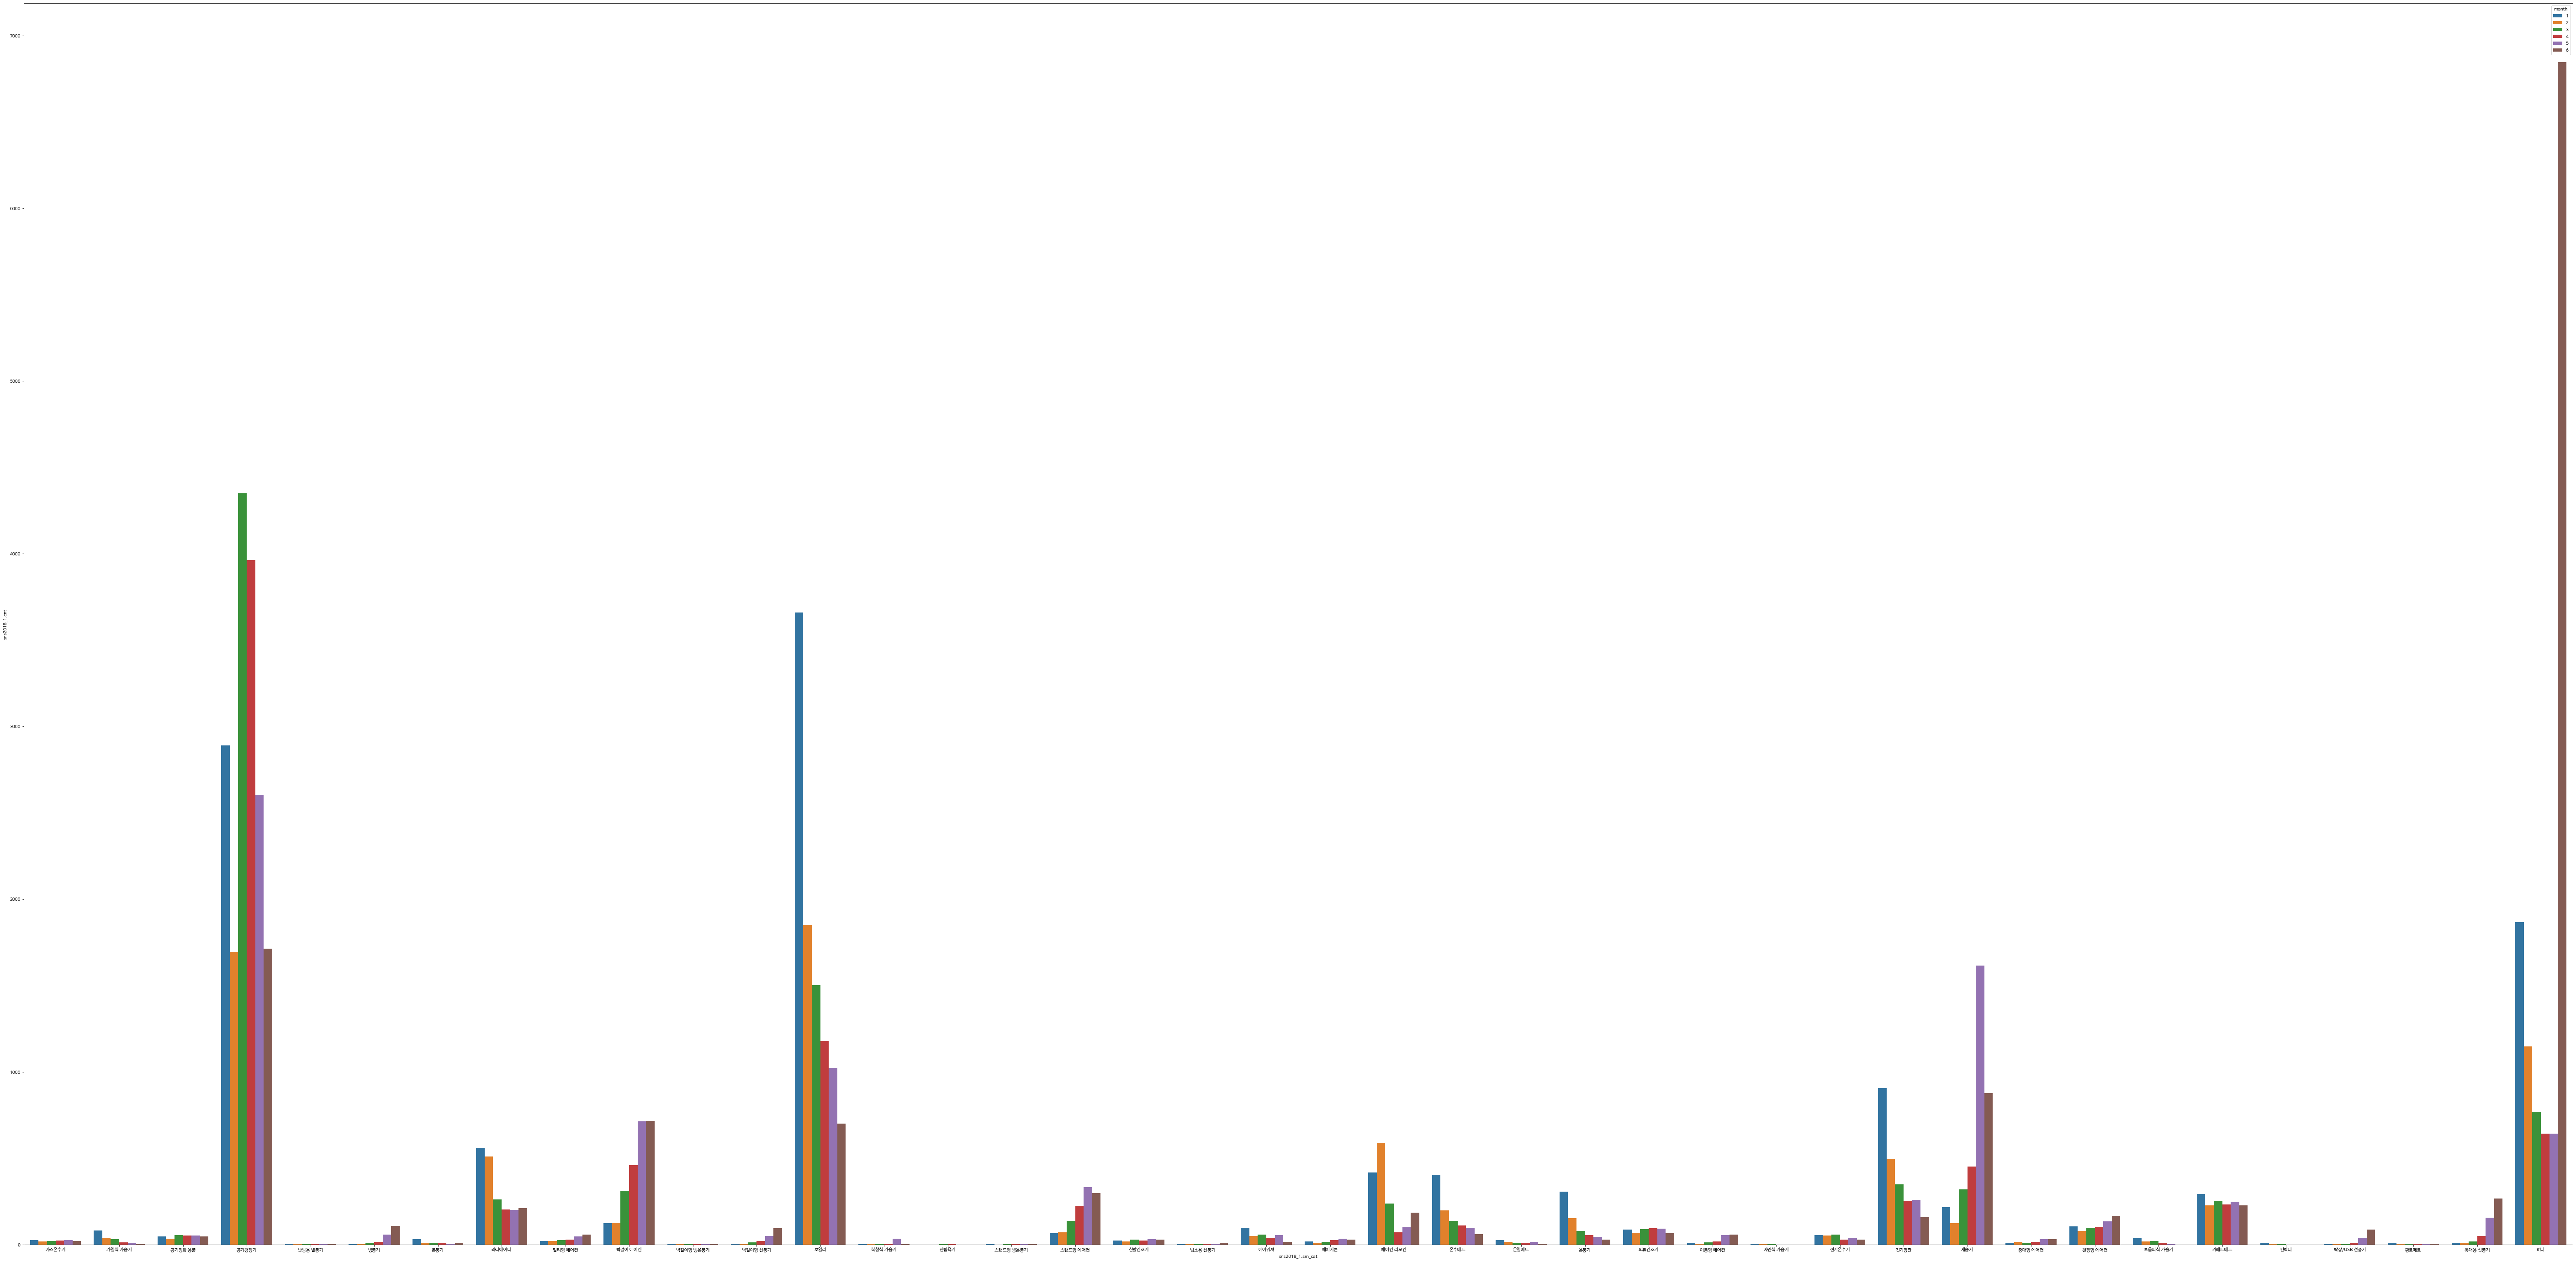

In [ ]:
#냉난방가전 월별 검색량 그래프 barh
#hue = month
#sns2018_1.sm_cat, sns2018_1.cnt
ind = np.arange(sns18bigcat1.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize = (100,50))
sns.barplot(x = 'sns2018_1.sm_cat', y = 'sns2018_1.cnt', hue = 'month', data = sns18bigcat1)
#ax,set_yticks(ind)
#ax.set_ytickslabels(sns2018_1.column_name.values, rotation = 'horizontal')
plt.show()

In [ ]:
sns18bigcat1['month'].unique()

array([1, 2, 3, 4, 5, 6])

## 뷰티 품목 월간 검색량

In [ ]:
sns18bigcat2 = monthlycnt_sum[monthlycnt_sum['sns2018_1.big_cat'] == "뷰티"]
sns18bigcat2.head()

,sns2018_1.big_cat,sns2018_1.sm_cat,month,sns2018_1.cnt
240,뷰티,기능성 링클케어 화장품,1,614.697815
241,뷰티,기능성 링클케어 화장품,2,512.759400
242,뷰티,기능성 링클케어 화장품,3,536.172718
243,뷰티,기능성 링클케어 화장품,4,499.257357
244,뷰티,기능성 링클케어 화장품,5,452.458058


In [ ]:
buybigcat2 = monthlyqty_sum[monthlyqty_sum['buy2018_1.big_cat'] == "뷰티"]
buybigcat2.head()

,buy2018_1.big_cat,buy2018_1.sm_cat,month,buy2018_1.qty
235,뷰티,기능성 링클케어 화장품,1,278
236,뷰티,기능성 링클케어 화장품,2,148
237,뷰티,기능성 링클케어 화장품,3,242
238,뷰티,기능성 링클케어 화장품,4,137
239,뷰티,기능성 링클케어 화장품,5,147


In [ ]:
#월간으로 보기 복잡해서, ".sm_cat" 별 검색량과 합계량만 볼 거야
#검색량
qtybysmcat = buybigcat2.drop(['month'], axis = 1)
qtybysmcat.head()

,buy2018_1.big_cat,buy2018_1.sm_cat,buy2018_1.qty
235,뷰티,기능성 링클케어 화장품,278
236,뷰티,기능성 링클케어 화장품,148
237,뷰티,기능성 링클케어 화장품,242
238,뷰티,기능성 링클케어 화장품,137
239,뷰티,기능성 링클케어 화장품,147


In [ ]:
qtybysmcat = qtybysmcat[['buy2018_1.big_cat', 'buy2018_1.sm_cat', 'buy2018_1.qty']].groupby(['buy2018_1.big_cat', 'buy2018_1.sm_cat'], as_index = False).sum()

In [ ]:
qtybysmcat.head() #월별 무시하고 상반기 총 판매량

,buy2018_1.big_cat,buy2018_1.sm_cat,buy2018_1.qty
0,뷰티,기능성 링클케어 화장품,999
1,뷰티,기능성 모공관리 화장품,5943
2,뷰티,기능성 아이케어 화장품,73217
3,뷰티,기능성 영양보습 화장품,2054
4,뷰티,기능성 트러블케어 화장품,9080


In [ ]:
cntbysmcat = sns18bigcat2.drop(['month'], axis =1)
cntbysmcat.head()

,sns2018_1.big_cat,sns2018_1.sm_cat,sns2018_1.cnt
240,뷰티,기능성 링클케어 화장품,614.697815
241,뷰티,기능성 링클케어 화장품,512.759400
242,뷰티,기능성 링클케어 화장품,536.172718
243,뷰티,기능성 링클케어 화장품,499.257357
244,뷰티,기능성 링클케어 화장품,452.458058


In [ ]:
cntbysmcat = cntbysmcat[['sns2018_1.big_cat', 'sns2018_1.sm_cat', 'sns2018_1.cnt']].groupby(['sns2018_1.big_cat', 'sns2018_1.sm_cat'], as_index = False).sum()
cntbysmcat.head() 

,sns2018_1.big_cat,sns2018_1.sm_cat,sns2018_1.cnt
0,뷰티,기능성 링클케어 화장품,3034.148344
1,뷰티,기능성 모공관리 화장품,24187.302051
2,뷰티,기능성 아이케어 화장품,673.456023
3,뷰티,기능성 영양보습 화장품,1971.797016
4,뷰티,기능성 트러블케어 화장품,24823.295173


In [ ]:
print(cntbysmcat.shape, qtybysmcat.shape)

(131, 3) (130, 3)


In [ ]:
qtycnt = pd.concat(cntbysmcat, qtybysmcat,axis = 1)
qtycnt.head()

TypeError: ignored

In [ ]:
print(sns18bigcat2.info())
print(sns18bigcat2.describe())
#print(sns18bigcat2.unique)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 240 to 1025
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sns2018_1.big_cat  786 non-null    object 
 1   sns2018_1.sm_cat   786 non-null    object 
 2   month              786 non-null    int64  
 3   sns2018_1.cnt      786 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 30.7+ KB
None
            month  sns2018_1.cnt
count  786.000000     786.000000
mean     3.500000     619.723289
std      1.708913     881.542605
min      1.000000       0.402764
25%      2.000000      72.016230
50%      3.500000     273.211970
75%      5.000000     792.366738
max      6.000000    4862.597312


In [ ]:
print(sns18bigcat2['sns2018_1.sm_cat'].unique())
print(sns18bigcat2['sns2018_1.sm_cat'].nunique())

['기능성 링클케어 화장품' '기능성 모공관리 화장품' '기능성 아이케어 화장품' '기능성 영양보습 화장품'
 '기능성 트러블케어 화장품' '기능성 화이트닝 화장품' '기능성 화장품 세트' '기초 화장용 로션' '기초 화장용 미스트'
 '기초 화장용 스킨' '기초 화장용 에센스' '기초 화장용 오일/앰플' '기초 화장용 크림' '남성 로션' '남성 메이크업'
 '남성 선케어' '남성 세트' '남성 쉐이빙' '남성 스킨' '남성 에센스' '남성 크림' '남성 클렌징' '남성향수'
 '네일 메이크업 용품' '네일관리 소품' '네일리무버' '네일세트' '네일아트' '네일컬러' '네일케어' '데오드란트' '린스'
 '립앤아이 리무버' '메이크업 박스' '메이크업 브러쉬' '미용가위' '바디 보습제' '바디 세트' '바디 스크럽' '바디 클렌져'
 '바디케어용 땀패드' '바디케어용 때비누' '바디케어용 볼륨업크림' '바디케어용 슬리밍' '바디케어용 제모제'
 '바디케어용 청 결제' '베이스 메이크업 세트' '베이스 메이크업용 BB크림' '베이스 메이크업용 CC크림'
 '베이스 메이크업용 가루파우더' '베이스 메이크업용 메이크업베이스' '베이스 메이크업용 컨실러' '베이스 메이크업용 쿠션팩트'
 '베이스 메이크업용 트윈케이크' '베이스 메이크업용 파우더팩트' '베이스 메이크업용 파운데이션' '베이스 메이크업용 프라이머'
 '뷰티 눈썹정리도구' '뷰티 속눈썹/쌍꺼풀' '뷰티 손거울' '뷰티 타투' '뷰티 헤어캡' '뷰티 화장솜'
 '뷰티 화장품 공병/케이스' '뷰티용 기름종이' '뷰티용 면봉/귀이개' '뷰티용 뷰러' '뷰티용 샤프너' '뷰티용 여드름압출기'
 '색조 메이크업 립글로스' '색조 메이크업 립라이너' '색조 메이크업 립밤' '색조 메이크업 립스틱' '색조 메이크업 립틴트'
 '색조 메이크업 마스카라' '색조 메이크업 볼터치' '색조 메이크업 세트' '색조 메이크업 속눈썹영양제'
 '색조 메이크업 쉐딩/하이라이터' '색조 메이크업 아이라이너' '색조 메이크업 아이

In [ ]:
type(sns18bigcat2['sns2018_1.sm_cat'].unique())

numpy.ndarray

In [ ]:
fig,axes = plt.subplots(ncols = 12, nrows = 11, figsize = (100,100))
axs = axes.ravel()

names = list(sns18bigcat2['sns2018_1.sm_cat'].unique())

for ax, col, name in zip(axs, sns18bigcat2.columns, names):
  ax.hist(x = sns18bigcat2[col])
  ax.set_xlabel(f"{name}")
fig.tight_layout()

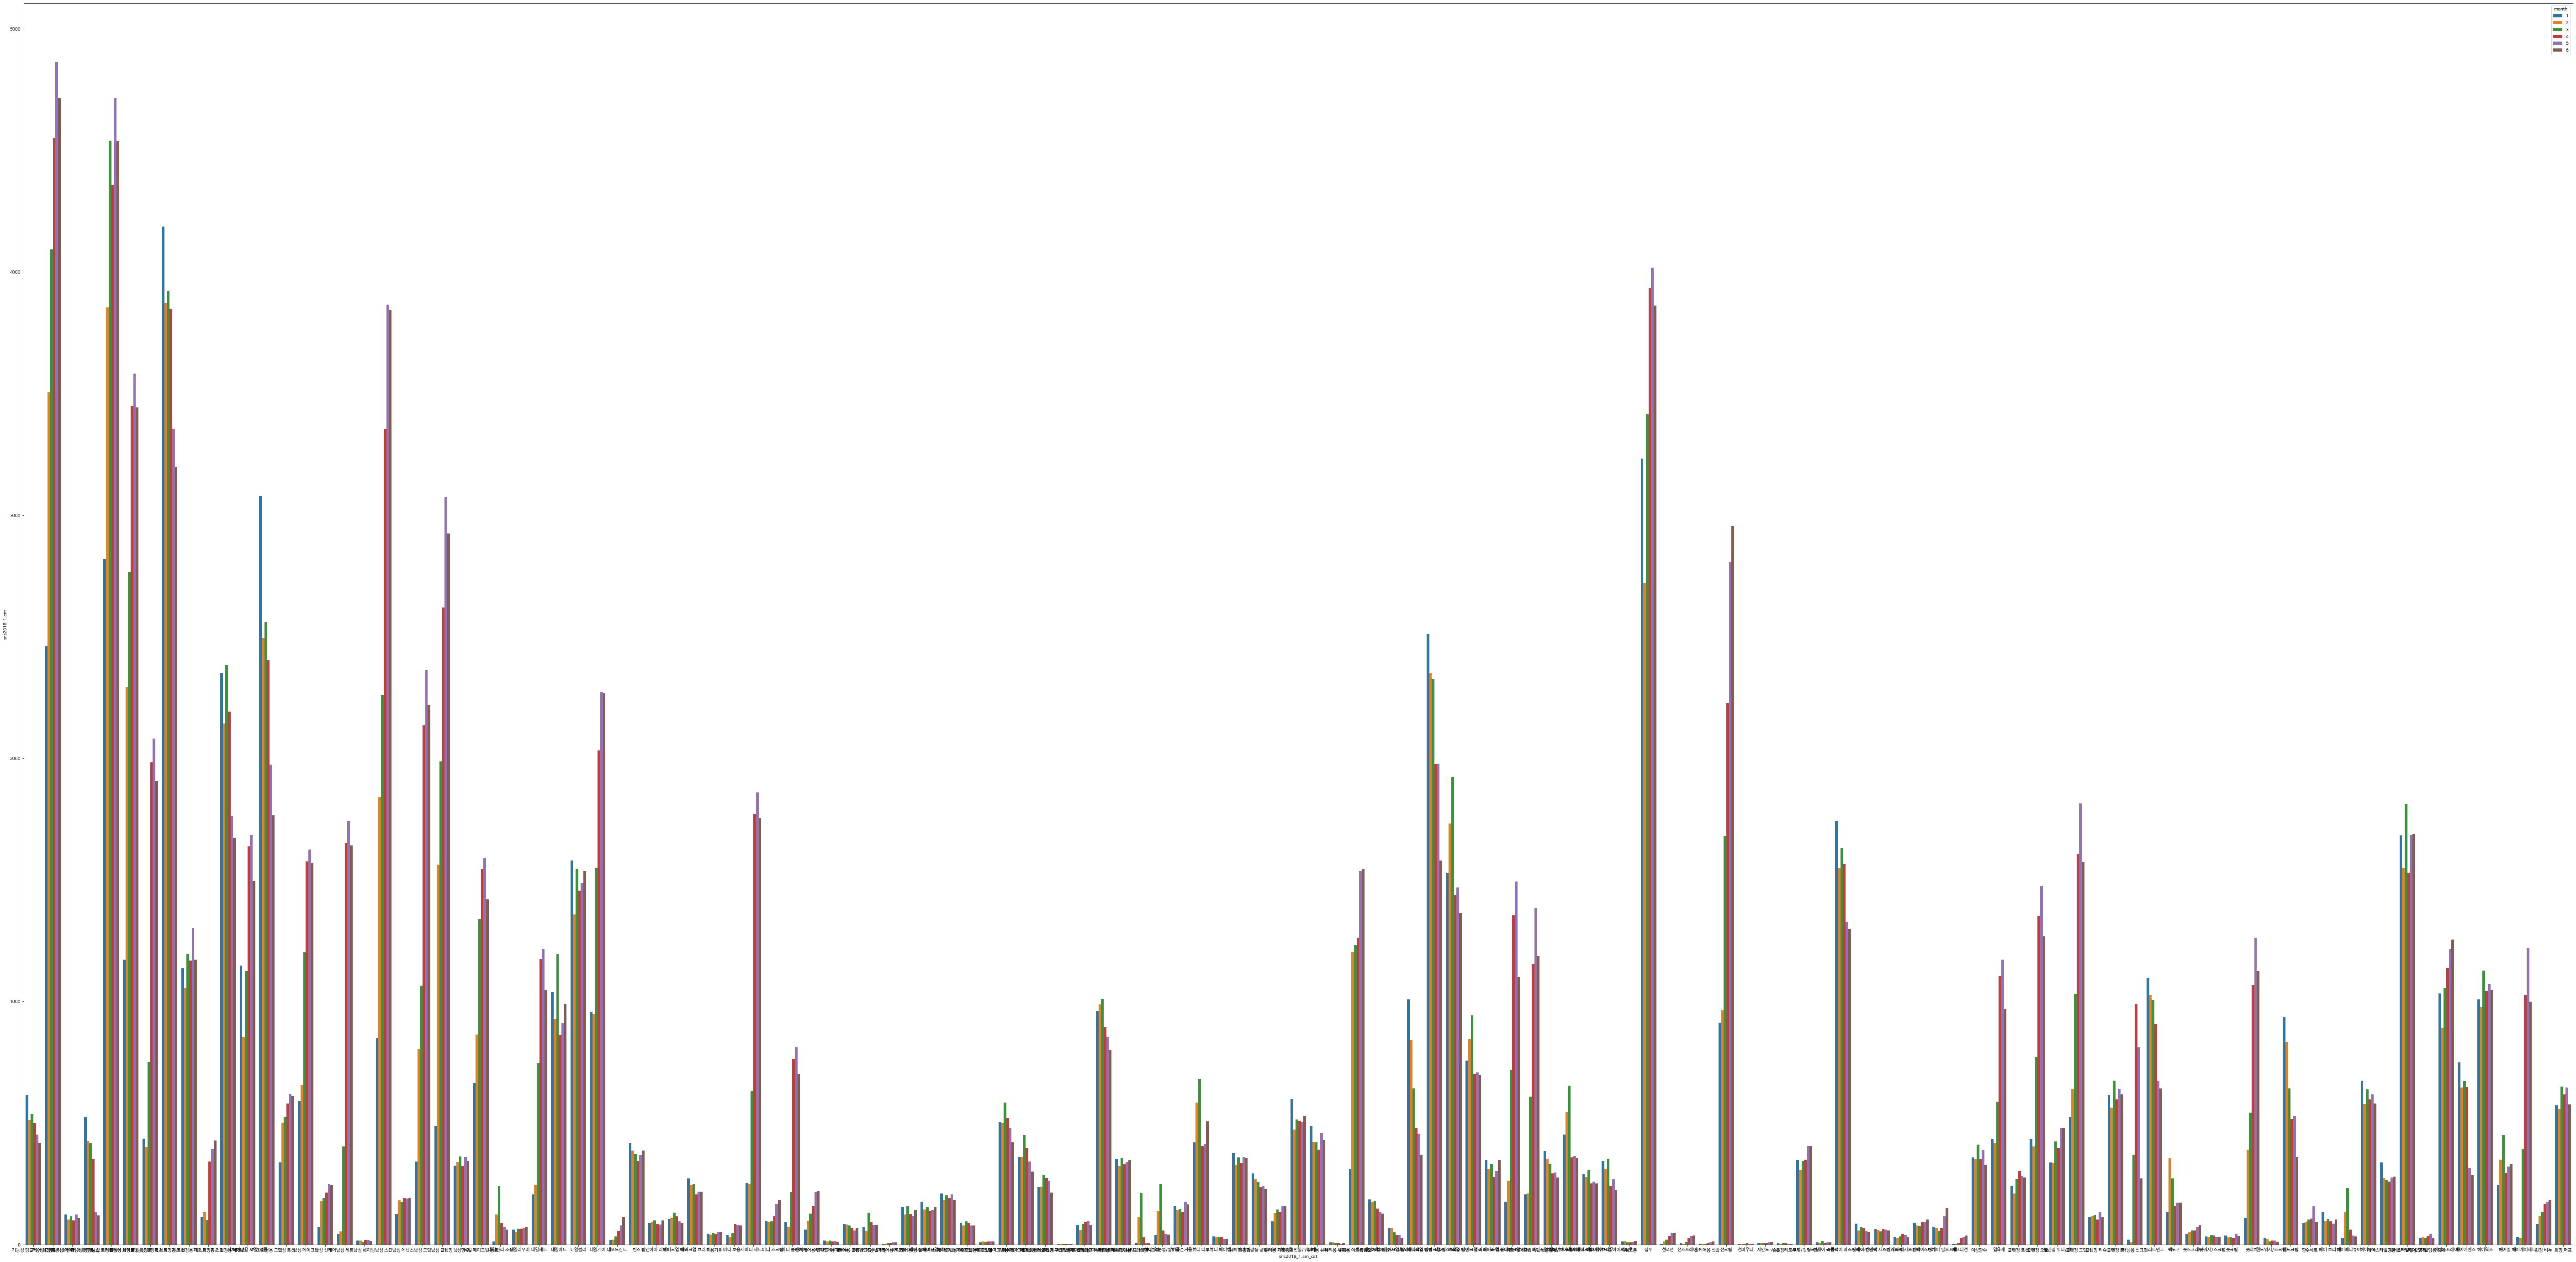

In [ ]:
ind = np.arange(sns18bigcat1.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize = (100,50))
sns.barplot(x = 'sns2018_1.sm_cat', y = 'sns2018_1.cnt', hue = 'month', data = sns18bigcat2)
plt.show()

In [ ]:
# 시각화 : 제품별 월간 검색량


In [ ]:
type(sns18bigcat2['sns2018_1.sm_cat'].unique())

numpy.ndarray

In [ ]:
#str(sns18bigcat2['sns2018_1.sm_cat'].values)
df_smcat = pd.DataFrame(sns18bigcat2['sns2018_1.sm_cat'].values)
type(df_smcat)
df_smcat.head()

,0
0,기능성 링클케어 화장품
1,기능성 링클케어 화장품
2,기능성 링클케어 화장품
3,기능성 링클케어 화장품
4,기능성 링클케어 화장품


In [ ]:
#딕셔너리 만들기
#key
#value
#기능성랑클케어화장품*1

In [ ]:
listsmcat = (sns18bigcat2['sns2018_1.sm_cat']).values.tolist()

In [ ]:
num = 0
key = []
for i in range(0,132):
  for num in range(0,7):
    keyy = print(df_smcat.values[i] + num)
    key.append(keyy)
    num += 1
  i += 1
print(key)

TypeError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52992 missing from current font.
  font.set_

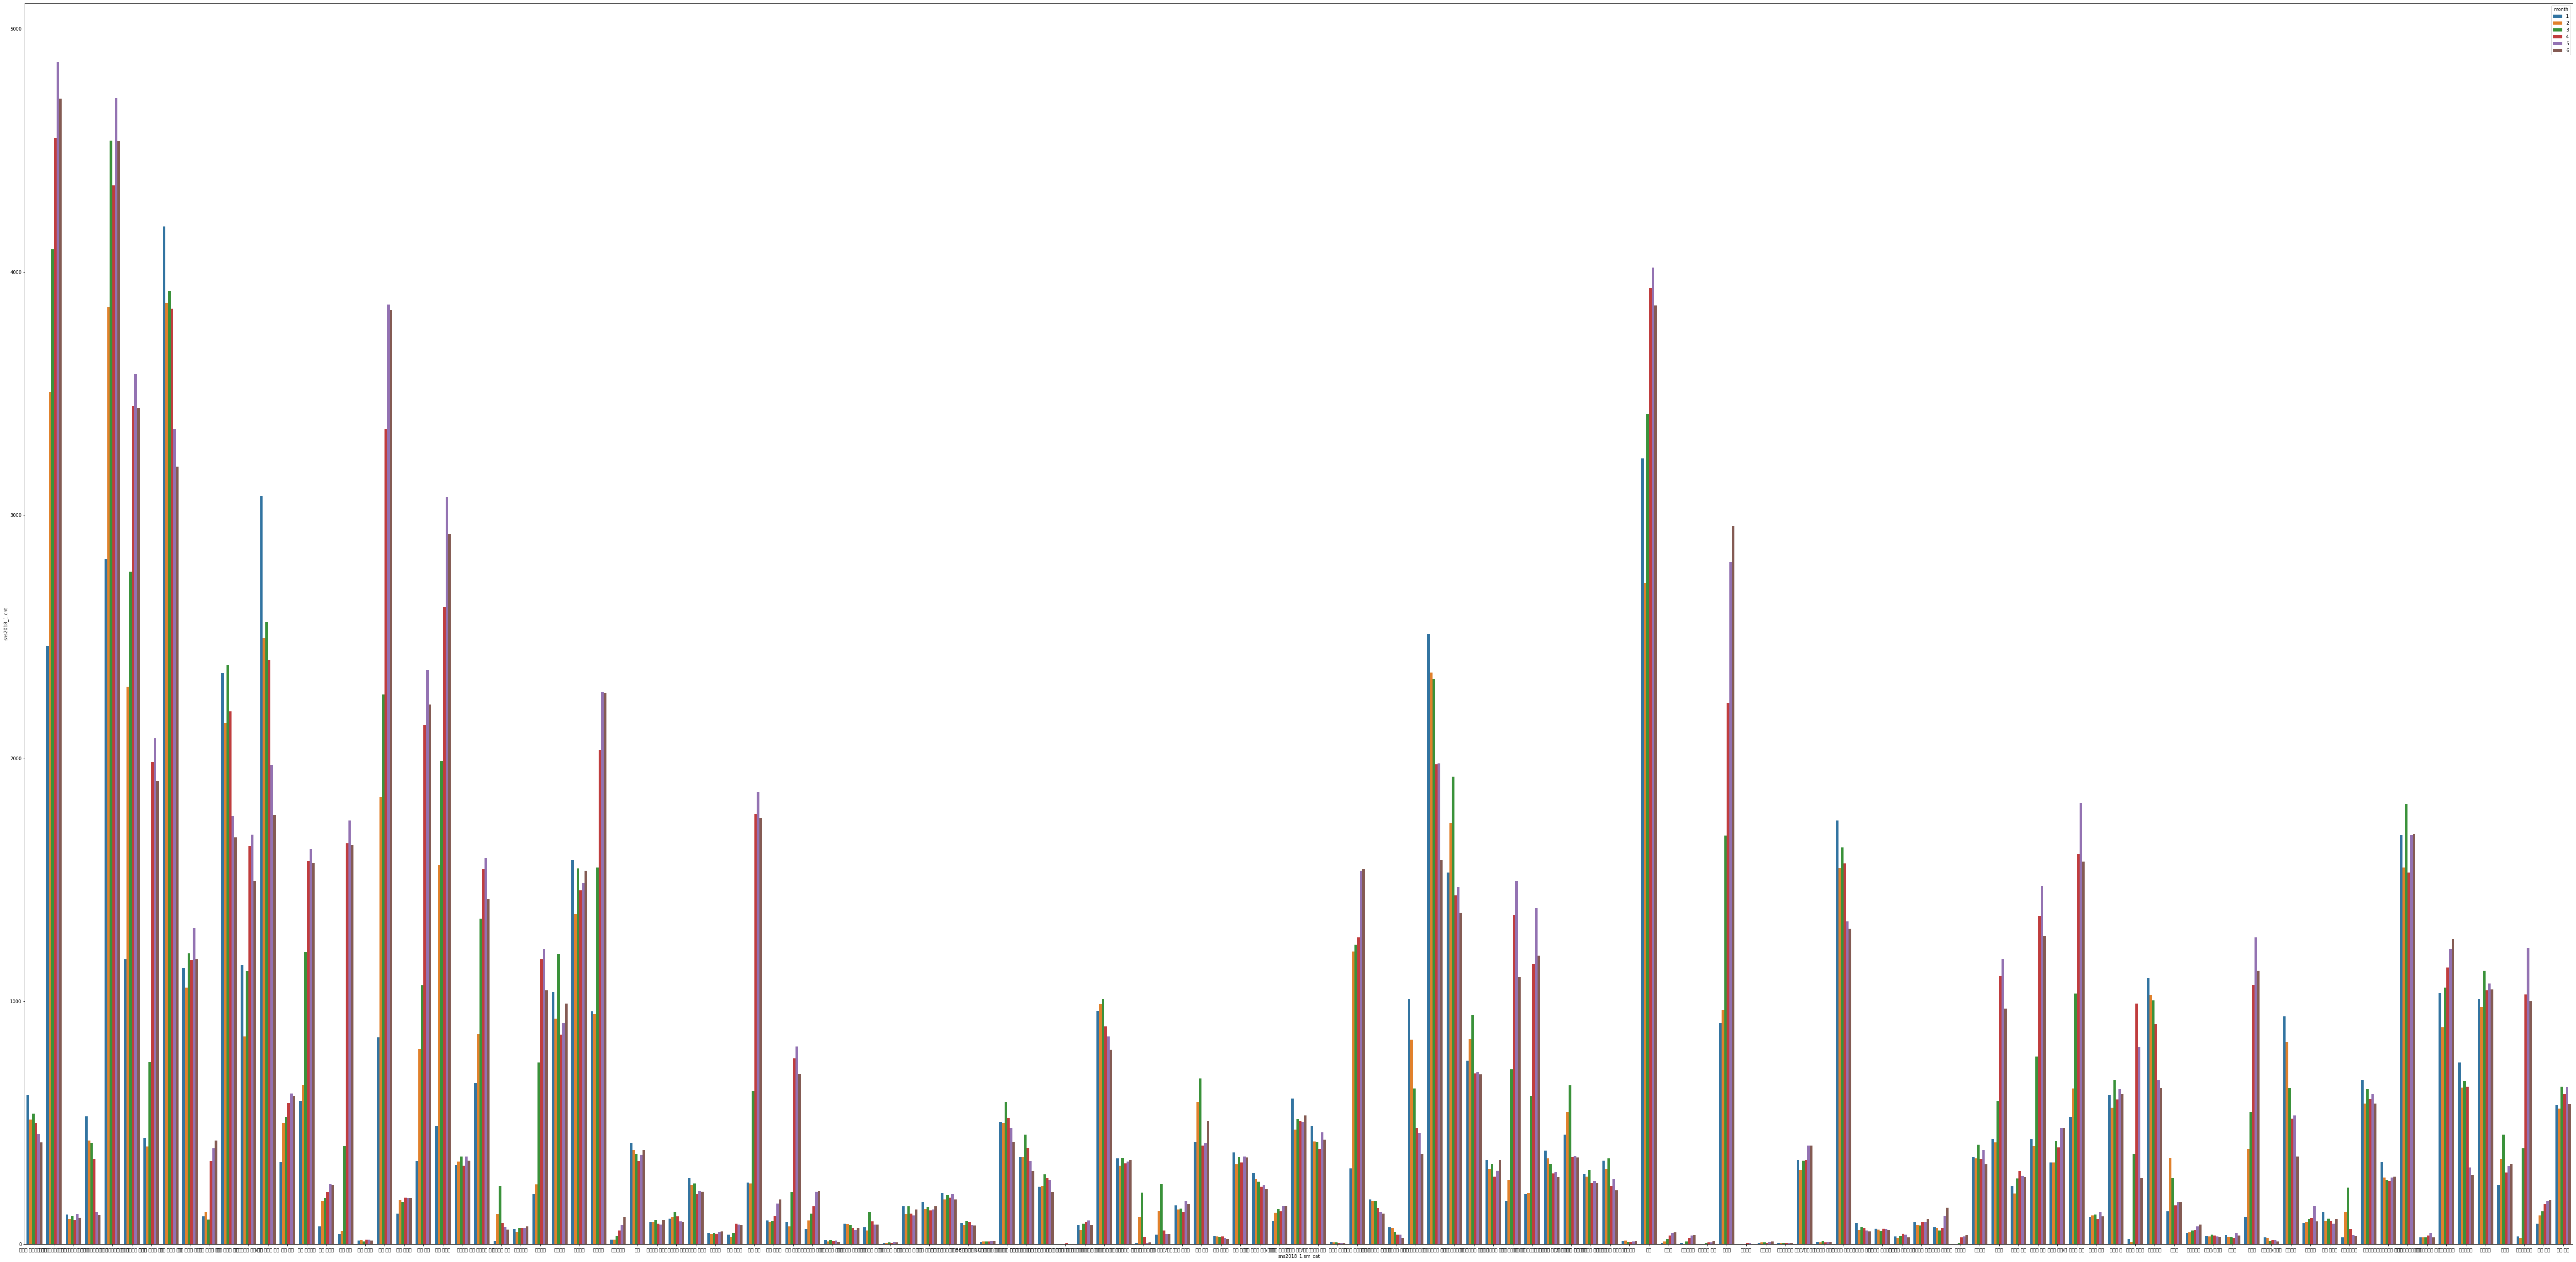

In [ ]:
ind = np.arange(sns18bigcat2.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize = (100,50))
sns.barplot(x = 'sns2018_1.sm_cat', y = 'sns2018_1.cnt', hue = 'month', data = sns18bigcat2)
#ax,set_yticks(ind)
#ax.set_ytickslabels(sns2018_1.column_name.values, rotation = 'horizontal')
plt.show()

In [ ]:
sns18bigcat3 = monthlycnt_sum[monthlycnt_sum['sns2018_1.big_cat'] == "식품"]
sns18bigcat3.head()

,sns2018_1.big_cat,sns2018_1.sm_cat,month,sns2018_1.cnt
1026,식품,가공란,1,44.120570
1027,식품,가공란,2,46.673708
1028,식품,가공란,3,56.829172
1029,식품,가공란,4,59.955087
1030,식품,가공란,5,71.385117


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_

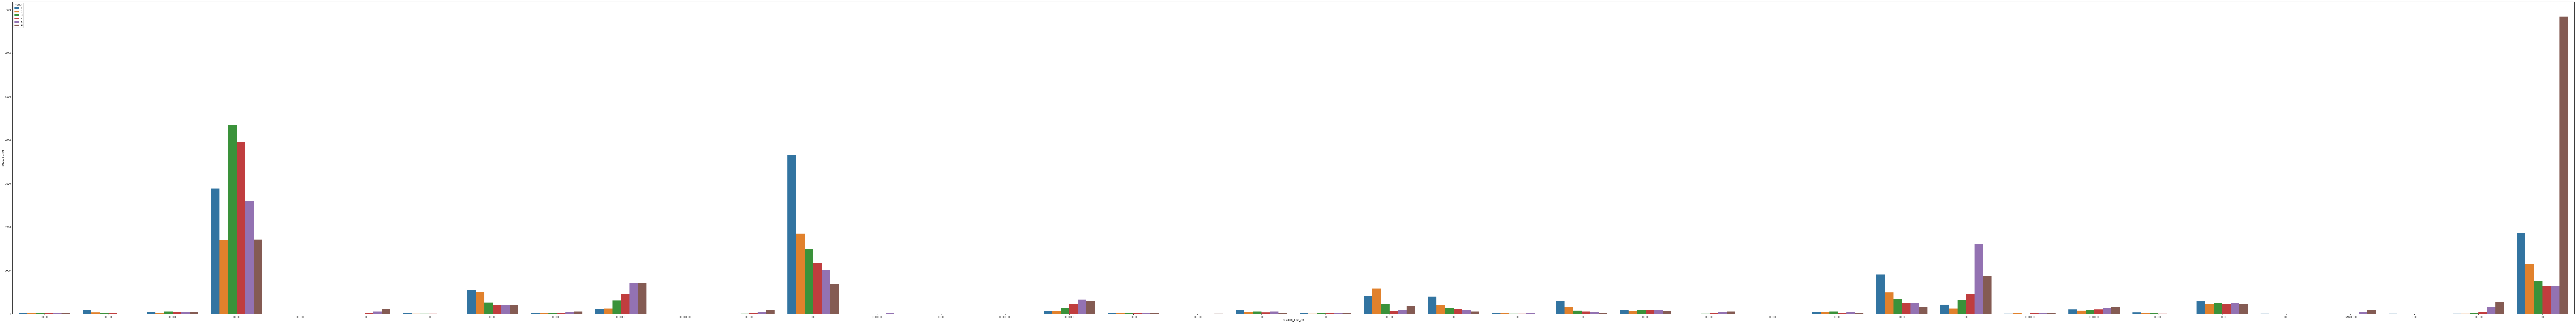

In [ ]:
ind = np.arange(sns18bigcat1.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize = (200,25))
sns.barplot(x = 'sns2018_1.sm_cat', y = 'sns2018_1.cnt', hue = 'month', data = sns18bigcat1)
#ax,set_yticks(ind)
#ax.set_ytickslabels(sns2018_1.column_name.values, rotation = 'horizontal')
plt.show()

In [ ]:
#반복문으로 만들어서 어떻게든 해낼거임
for x in monthlycnt_sum['sns2018_1.big_cat'].unique() :
  print(x)
  if monthlycnt_sum['sns2018_1.big_cat'] == x :
    monthlycnt_sum[monthlycnt_sum['sns2018_1.big_cat'] == x].head()


ValueError: ignored

## adf

In [ ]:
sns2018_1.columns

Index(['Unnamed: 0', 'sns2018_1.date', 'sns2018_1.big_cat', 'sns2018_1.sm_cat',
       'sns2018_1.cnt'],
      dtype='object')

In [ ]:
sns2018_1[['sns2018_1.cnt','sns2018_1.date', 'sns2018_1.big_cat','sns2018_1.sm_cat']].groupby(['sns2018_1.big_cat', 'sns2018_1.date'], as_index = True).count()

sns2018_1.cnt  sns2018_1.sm_cat
sns2018_1.big_cat sns2018_1.date                                 
냉난방가전             20180101                   40                40
                  20180102                   40                40
                  20180103                   40                40
                  20180104                   40                40
                  20180105                   40                40
...                                         ...               ...
식품                20180626                  212               212
                  20180627                  212               212
                  20180628                  212               212
                  20180629                  212               212
                  20180630                  212               212

[543 rows x 2 columns]

In [ ]:
sns2018_1[['sns2018_1.cnt','sns2018_1.date', 'sns2018_1.sm_cat']].groupby(['sns2018_1.sm_cat', 'sns2018_1.date'], as_index = True).count()

sns2018_1.cnt
sns2018_1.sm_cat sns2018_1.date               
가공란              20180101                    1
                 20180102                    1
                 20180103                    1
                 20180104                    1
                 20180105                    1
...                                        ...
히터               20180626                    1
                 20180627                    1
                 20180628                    1
                 20180629                    1
                 20180630                    1

[69323 rows x 1 columns]

* 월 단위, 주 단위로 쪼개기
* 기간 단위 별로 검색량 합치기
* 판매량을 예측하기 위해선, 테스트set이 필요하지 않은지? 학습 모델링을 할 필요는 없는지?
    * 날씨 예측을 해볼 수 있는지? (우리가 2018-2019 에 한 날씨 분석(모형적합)과 2021 날씨가 유사한지 (테스트셋)
    * 날씨와 소비 간의 연관성이 큰 지 -> 이걸 어떻게 보지?


In [ ]:
sns2018_1

In [ ]:
#우선 sns2018_1.date 에서 월만 추출한 뒤
#월별 big_cat 구매량을 보고
#막대 그래프로 구매 건수 뛰는 순간을 살펴보자

## 시도
해보고 싶은 것들

In [ ]:
#군집
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
#X에 해당하는 값이 뭐야? 
kmeans.fit(sns2018_1['sns2018_1.cnt']) 
#sns2018_1.cnt를 2D array로 바꾸어야 하는 듯
#왜 유방암 데이터는 2d array였을까 어떤 값들로 2d array였는지 알면 데이터를 2d array로 변환할 수 있지 않겠어?

ValueError: ignored